In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data

In [101]:
df = pd.read_csv('Test_set_prediction.csv')

Change data types for lower memory consumption and faster processing

In [102]:
df['age'] = df['age'].astype('uint8')
df['race'] = df['race'].astype('category')
df['label_0'] = df['label_0'].astype('uint8')
df['label_1'] = df['label_1'].astype('uint8')
df['label_2'] = df['label_2'].astype('uint8')
df['label_3'] = df['label_3'].astype('uint8')
df['label_4'] = df['label_4'].astype('uint8')
df['label_5'] = df['label_5'].astype('uint8')

Create a profiling report

(Optional, generates a nice report)

In [103]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="CXR Profiling Report")
# profile
# profile.to_file("cxr_results_report.html")

### Preliminary analysis

In [106]:
df.head()


,subject_id,age,race,gender,pred_0,label_0,pred_1,label_1,pred_2,label_2,pred_3,label_3,pred_4,label_4,pred_5,label_5
0,11812752,68,WHITE,F,0.056143,0,0.015012,0,0.001175,0,0.004269,0,0.091285,0,0.759478,1
1,11812752,68,WHITE,F,0.051060,0,0.006028,0,0.001799,0,0.006515,0,0.050387,0,0.863849,1
2,11812752,68,WHITE,F,0.021372,0,0.004059,0,0.000743,0,0.004475,0,0.092967,0,0.849508,1
3,11812752,68,WHITE,F,0.031842,0,0.001862,0,0.000797,0,0.006196,0,0.047191,0,0.934808,1
4,15197921,255,NaN,NaN,0.034598,0,0.010697,0,0.000503,0,0.005243,0,0.077575,0,0.871780,1


In [107]:
print(df.shape)


(58386, 16)


In [108]:
print(df.columns)


Index(['subject_id', 'age', 'race', 'gender', 'pred_0', 'label_0', 'pred_1',
       'label_1', 'pred_2', 'label_2', 'pred_3', 'label_3', 'pred_4',
       'label_4', 'pred_5', 'label_5'],
      dtype='object')


In [109]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58386 entries, 0 to 58385
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   subject_id  58386 non-null  int64   
 1   age         58386 non-null  uint8   
 2   race        50226 non-null  category
 3   gender      55547 non-null  object  
 4   pred_0      58386 non-null  float64 
 5   label_0     58386 non-null  uint8   
 6   pred_1      58386 non-null  float64 
 7   label_1     58386 non-null  uint8   
 8   pred_2      58386 non-null  float64 
 9   label_2     58386 non-null  uint8   
 10  pred_3      58386 non-null  float64 
 11  label_3     58386 non-null  uint8   
 12  pred_4      58386 non-null  float64 
 13  label_4     58386 non-null  uint8   
 14  pred_5      58386 non-null  float64 
 15  label_5     58386 non-null  uint8   
dtypes: category(1), float64(6), int64(1), object(1), uint8(7)
memory usage: 4.0+ MB
None


In [110]:
all_null_race_subjects = []
all_null_gender_subjects = []
all_null_both_subjects = []

unique_subject_ids = df['subject_id'].unique()

for subject_id in unique_subject_ids:
    subject_data = df[df['subject_id'] == subject_id]
    if subject_data['race'].isnull().all():
        all_null_race_subjects.append(subject_id)
    if subject_data['gender'].isnull().all():
        all_null_gender_subjects.append(subject_id)
    if subject_data['race'].isnull().all() and subject_data['gender'].isnull().all():
        all_null_both_subjects.append(subject_id)

count_null_race = len(all_null_race_subjects)
count_null_gender = len(all_null_gender_subjects)
count_null_both = len(all_null_both_subjects)

print("Subject IDs with all instances having null values in race:")
print(all_null_race_subjects)
print(f"Count: {count_null_race}")

print("\nSubject IDs with all instances having null values in gender:")
print(all_null_gender_subjects)
print(f"Count: {count_null_gender}")

print("\nSubject IDs with all instances having null values in both race and gender:")
print(all_null_both_subjects)
print(f"Count: {count_null_both}")

Subject IDs with all instances having null values in race:
[np.int64(15197921), np.int64(10074567), np.int64(19796678), np.int64(12969311), np.int64(19402178), np.int64(16462796), np.int64(10959615), np.int64(10089438), np.int64(17071144), np.int64(10327961), np.int64(16839695), np.int64(18001786), np.int64(16413997), np.int64(11414493), np.int64(13470458), np.int64(12603299), np.int64(19457990), np.int64(17907886), np.int64(15314278), np.int64(10956998), np.int64(10743215), np.int64(15614836), np.int64(16158113), np.int64(18892880), np.int64(14009508), np.int64(10639545), np.int64(11780191), np.int64(13059528), np.int64(10010253), np.int64(15842144), np.int64(15650284), np.int64(19290387), np.int64(19192640), np.int64(15265452), np.int64(18129779), np.int64(13363704), np.int64(15355483), np.int64(13962105), np.int64(18710140), np.int64(10618425), np.int64(11926278), np.int64(19041368), np.int64(19452081), np.int64(19347019), np.int64(12702896), np.int64(15695407), np.int64(10263121), 

In [111]:
df['age'] = df['age'].replace(-1, np.nan)

In [112]:
pred_columns = [col for col in df.columns if 'pred' in col]
for col in pred_columns:
    df[f'{col}_label'] = df[col].apply(lambda x: 1 if x > 0.5 else 0)


In [113]:
df.describe()

,subject_id,age,pred_0,label_0,pred_1,label_1,pred_2,label_2,pred_3,label_3,pred_4,label_4,pred_5,label_5,pred_0_label,pred_1_label,pred_2_label,pred_3_label,pred_4_label,pred_5_label
count,5.838600e+04,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.0,58386.000000,58386.000000
mean,1.504712e+07,69.011184,0.228647,0.126452,0.143814,0.150858,0.023295,0.079968,0.007710,0.020279,0.221118,0.233361,0.488173,0.444764,0.101634,0.089028,0.000839,0.0,0.062172,0.487017
std,2.842240e+06,45.523478,0.182675,0.332360,0.208286,0.357914,0.051255,0.271246,0.007132,0.140954,0.154104,0.422973,0.290151,0.496944,0.302169,0.284787,0.028958,0.0,0.241471,0.499836
min,1.000112e+07,18.000000,0.000713,0.000000,0.000045,0.000000,0.000003,0.000000,0.000126,0.000000,0.003861,0.000000,0.002603,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.260147e+07,49.000000,0.076932,0.000000,0.011122,0.000000,0.001015,0.000000,0.003414,0.000000,0.098114,0.000000,0.217903,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.510800e+07,62.000000,0.180953,0.000000,0.044808,0.000000,0.004347,0.000000,0.005793,0.000000,0.184704,0.000000,0.485509,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.746113e+07,75.000000,0.343238,0.000000,0.185651,0.000000,0.019601,0.000000,0.009670,0.000000,0.310742,0.000000,0.755457,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
max,1.999844e+07,255.000000,0.936132,1.000000,0.996474,1.000000,0.747137,1.000000,0.193383,1.000000,0.934002,1.000000,0.991699,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


Analysis of Statistics:
    
### Age:
      Mean Age: 59.51 years
      Standard Deviation: 17.89 years, indicating a relatively diverse age distribution.
      Age Range: The youngest subject is 18 years old, and the oldest is 91 years old.

### Pred:
      mean of preds are as follows -> pred_0 : 0.228647, pred_1 : 0.143814,
                                      pred_2 : 0.023295, pred_3 : 0.007710,
                                      pred_4 : 0.221118, pred_5 : 0.488173

      -> from the data above, we can clearly say that the model is most confident in predicting label_5
         and least confident in predicting label_3.

## **AGE**

In [114]:
null_count = df['age'].isnull().sum()
print(null_count)

0


2839 samples have -1 values in the data which are changed to null values.

/var/folders/cp/w6zb81516yz3b7dw7m2sgt_80000gn/T/ipykernel_6239/2877934414.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_distribution.index, y=age_distribution.values, palette='viridis')


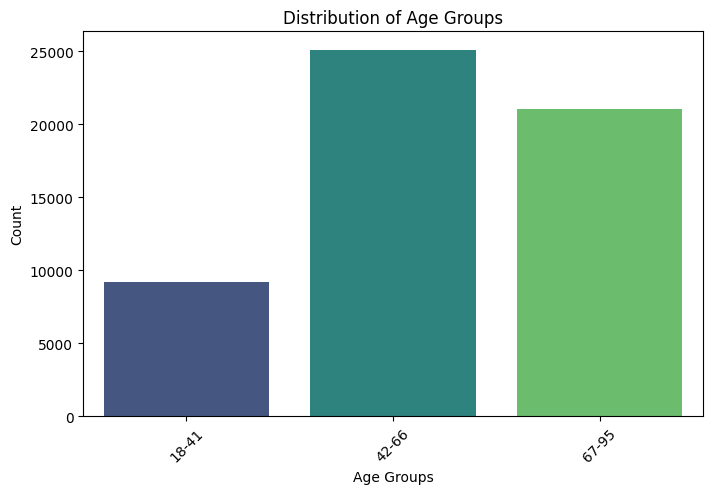

In [115]:
bins = [18, 41, 66, 95]
labels = ['18-41', '42-66', '67-95']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

age_distribution = df['age_group'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=age_distribution.index, y=age_distribution.values, palette='viridis')

plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.xticks(rotation=45)
plt.show()

/var/folders/cp/w6zb81516yz3b7dw7m2sgt_80000gn/T/ipykernel_6239/2315068532.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col: df[df['age_group'].notna() & (df[col] != 0)].groupby('age_group').size()
/var/folders/cp/w6zb81516yz3b7dw7m2sgt_80000gn/T/ipykernel_6239/2315068532.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col: df[df['age_group'].notna() & (df[col] != 0)].groupby('age_group').size()
/var/folders/cp/w6zb81516yz3b7dw7m2sgt_80000gn/T/ipykernel_6239/2315068532.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass ob

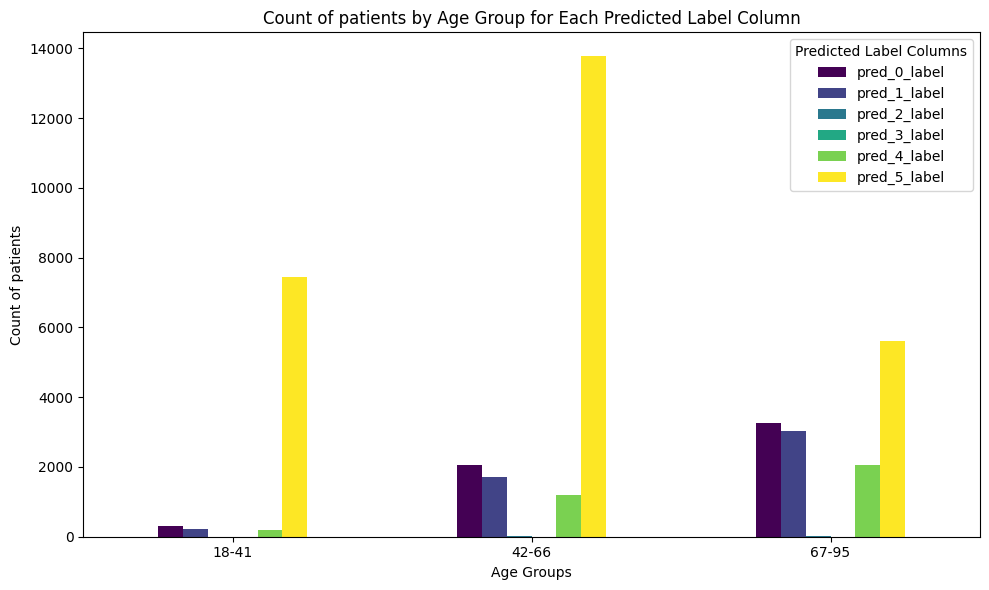

In [116]:
bins = [18, 41, 66, 95]
labels = ['18-41', '42-66', '67-95']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

label_columns = [col for col in df.columns if '_label' in col]

non_zero_counts_age = {
    col: df[df['age_group'].notna() & (df[col] != 0)].groupby('age_group').size()
    for col in label_columns
}

non_zero_df_age = pd.DataFrame(non_zero_counts_age).fillna(0)

non_zero_df_age.plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.xlabel('Age Groups')
plt.ylabel('Count of patients')
plt.title('Count of patients by Age Group for Each Predicted Label Column')
plt.xticks(rotation=0)
plt.legend(title='Predicted Label Columns')
plt.tight_layout()
plt.show()

In [117]:
non_zero_counts_age_df = pd.DataFrame(non_zero_counts_age).T.fillna(0)

print("\nPatients Counts by Age Group for Each Label Column:")
non_zero_counts_age_df


Patients Counts by Age Group for Each Label Column:


age_group,18-41,42-66,67-95
pred_0_label,306,2049,3255
pred_1_label,210,1709,3032
pred_2_label,0,14,34
pred_3_label,0,0,0
pred_4_label,191,1186,2046
pred_5_label,7435,13769,5608


In [118]:
age_stats = non_zero_counts_age_df.describe().T
print("\nStatistics for Non-Zero Counts by Age Group:")
age_stats


Statistics for Non-Zero Counts by Age Group:


,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
18-41,6.0,1357.000000,2980.092213,0.0,47.75,200.5,282.00,7435.0
42-66,6.0,3121.166667,5285.095020,0.0,307.00,1447.5,1964.00,13769.0
67-95,6.0,2329.166667,2138.919392,0.0,537.00,2539.0,3199.25,5608.0


In [119]:
age_pred_corr = df[['age'] + [col for col in df.columns if 'pred' in col and not col.endswith('label')]].corr()

print("Correlation Matrix Between Age and All Prediction Columns:")
print(age_pred_corr['age'])

Correlation Matrix Between Age and All Prediction Columns:
age       1.000000
pred_0    0.140496
pred_1    0.114993
pred_2    0.087973
pred_3    0.078313
pred_4    0.135394
pred_5   -0.178365
Name: age, dtype: float64


### Interpretation:
Correlation between age and all predicted labels:

Positive Correlation (e.g., label_0 to label_4):
The positive values indicate a positive correlation between the age and the respective label.
This means as the age increases, the likelihood of the label being present tends to increase as well.


Negative Correlation (label_5):
The negative value (-0.496172) for label_5 suggests a negative correlation.
As the age increases, the likelihood of this label being present tends to decrease.

## **RACE**

In [120]:
print(df['race'].unique())

['WHITE', NaN, 'BLACK/AFRICAN AMERICAN', 'OTHER', 'BLACK/CAPE VERDEAN', ..., 'HISPANIC/LATINO - HONDURAN', 'HISPANIC/LATINO - CENTRAL AMERICAN', 'WHITE - EASTERN EUROPEAN', 'ASIAN - KOREAN', 'UNABLE TO OBTAIN']
Length: 34
Categories (33, object): ['AMERICAN INDIAN/ALASKA NATIVE', 'ASIAN', 'ASIAN - ASIAN INDIAN', 'ASIAN - CHINESE', ..., 'WHITE - BRAZILIAN', 'WHITE - EASTERN EUROPEAN', 'WHITE - OTHER EUROPEAN', 'WHITE - RUSSIAN']


In [121]:
import json
with open("race_mapping.json", "w") as outfile:
    json.dump(grouped_races, outfile, indent=4, sort_keys=False)

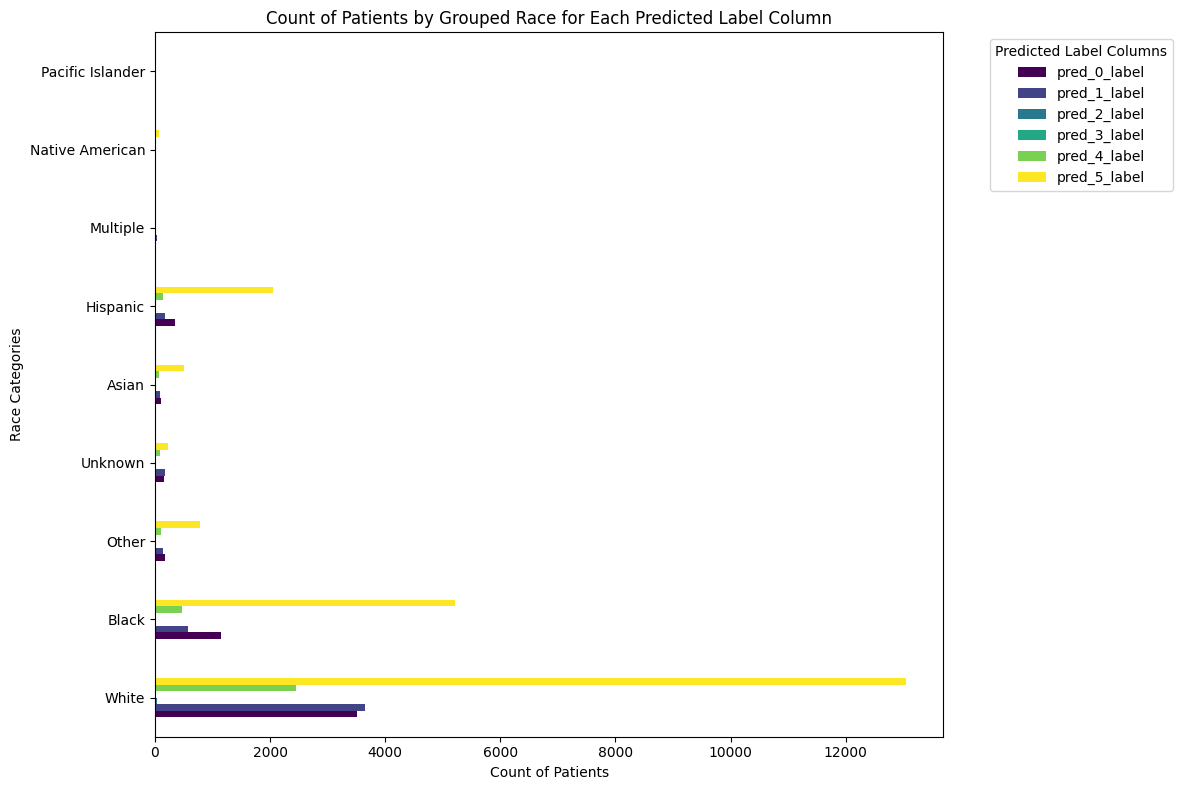

In [122]:

label_columns = [col for col in df.columns if '_label' in col]

# Read the race mapping from a JSON file
with open("race_mapping.json", "r") as outfile:
    grouped_races = json.load(outfile)


df['race_grouped'] = df['race'].map(grouped_races)

grouped_non_zero_counts_race = {
    race: {col: df[(df['race_grouped'] == race) & (df[col] != 0)].shape[0] for col in label_columns}
    for race in df['race_grouped'].unique() if race is not np.nan
}

grouped_non_zero_df = pd.DataFrame(grouped_non_zero_counts_race).T.fillna(0)

ax = grouped_non_zero_df.plot(kind='barh', figsize=(12, 8), colormap='viridis')

plt.xlabel('Count of Patients')
plt.ylabel('Race Categories')
plt.title('Count of Patients by Grouped Race for Each Predicted Label Column')
plt.legend(title='Predicted Label Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [123]:
non_zero_counts_race_df = pd.DataFrame(grouped_non_zero_counts_race).T.fillna(0)

print("\nPatient Counts by Race for Each Label Column:")
non_zero_counts_race_df


Patient Counts by Race for Each Label Column:


,pred_0_label,pred_1_label,pred_2_label,pred_3_label,pred_4_label,pred_5_label
White,3516,3657,42,0,2451,13046
Black,1156,578,2,0,467,5219
Other,181,143,0,0,109,781
Unknown,155,173,2,0,89,221
Asian,101,97,0,0,77,499
Hispanic,348,176,1,0,135,2060
Multiple,18,32,0,0,8,17
Native American,6,18,0,0,13,69
Pacific Islander,3,1,0,0,2,20


In [124]:
race_stats = non_zero_counts_race_df.T.describe().T

print("\nStatistics for Patient Counts by Race (with axes swapped):")
race_stats


Statistics for Patient Counts by Race (with axes swapped):


,count,mean,std,min,25%,50%,75%,max
White,6.0,3785.333333,4816.029388,0.0,644.25,2983.5,3621.75,13046.0
Black,6.0,1237.000000,1997.271138,0.0,118.25,522.5,1011.50,5219.0
Other,6.0,202.333333,293.059493,0.0,27.25,126.0,171.50,781.0
Unknown,6.0,106.666667,92.144814,0.0,23.75,122.0,168.50,221.0
Asian,6.0,129.000000,186.919234,0.0,19.25,87.0,100.00,499.0
Hispanic,6.0,453.333333,797.601321,0.0,34.50,155.5,305.00,2060.0
Multiple,6.0,12.500000,12.357184,0.0,2.00,12.5,17.75,32.0
Native American,6.0,17.666667,26.143195,0.0,1.50,9.5,16.75,69.0
Pacific Islander,6.0,4.333333,7.763161,0.0,0.25,1.5,2.75,20.0


## **Gender**

In [125]:
df['gender']  = df['gender'].fillna("UNKNOWN")
df['gender'] = df['gender'].astype('category')
print(df['gender'].unique())

['F', 'UNKNOWN', 'M']
Categories (3, object): ['F', 'M', 'UNKNOWN']


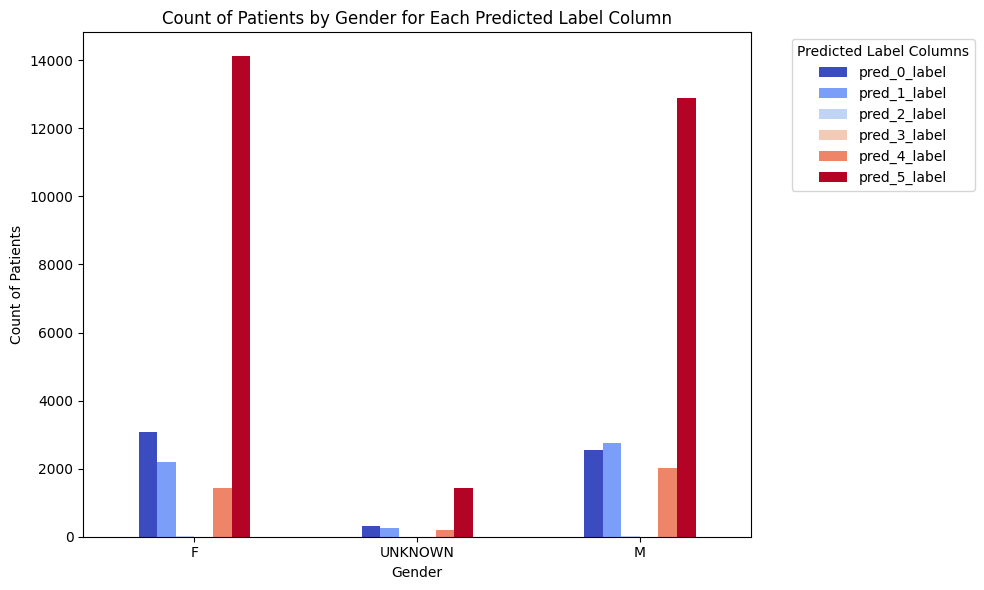

In [126]:
label_columns = [col for col in df.columns if '_label' in col]

non_zero_counts_gender = {
    gender: {col: df[(df['gender'] == gender) & (df[col] != 0)].shape[0] for col in label_columns}
    for gender in df['gender'].unique()
}

non_zero_gender_df = pd.DataFrame(non_zero_counts_gender).T.fillna(0)

ax = non_zero_gender_df.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')

plt.ylabel('Count of Patients')
plt.xlabel('Gender')
plt.title('Count of Patients by Gender for Each Predicted Label Column')
plt.xticks(rotation=0)
plt.legend(title='Predicted Label Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [127]:
non_zero_counts_gender_df = pd.DataFrame(non_zero_counts_gender)

print("No of Patients by Gender for Each Predicted Label Column:")
non_zero_counts_gender_df

No of Patients by Gender for Each Predicted Label Column:


,F,UNKNOWN,M
pred_0_label,3067,324,2543
pred_1_label,2197,246,2755
pred_2_label,24,1,24
pred_3_label,0,0,0
pred_4_label,1417,206,2007
pred_5_label,14114,1427,12894


In [128]:
gender_stats = non_zero_counts_gender_df.describe().T
print("\nStatistics for No. of patients by Gender:")
gender_stats


Statistics for No. of patients by Gender:


,count,mean,std,min,25%,50%,75%,max
F,6.0,3469.833333,5351.790333,0.0,372.25,1807.0,2849.5,14114.0
UNKNOWN,6.0,367.333333,535.659469,0.0,52.25,226.0,304.5,1427.0
M,6.0,3370.500000,4820.355039,0.0,519.75,2275.0,2702.0,12894.0
